In [1694]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

file_path='C:\\Users\\Raviraj Kuber\\Documents\\IIITB\\ml2\\train.csv'

In [1695]:
#Load Data
base_df=pd.read_csv(file_path)

**Initial Data Analysis**

In [1696]:
#View Data
base_df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [1697]:
#Base Data Shape
base_df.shape

(1460, 81)

In [1698]:
#View Data Statistics
base_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1699]:
#Get Basic Data Info
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1700]:
#Analyze Nulls
round((base_df.isnull().sum()/len(base_df))*100,2).sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

**Inference From Above Data**

**1) Out of 81 Columns, 38 Columns are Numeric in Nature.**

**2) 4 Columns have above 80% Nulls. Need to analyze these columns for skews & nulls Once Treated then we can plan for dropping or not.**

**3) There are Outliers present in the dataset, need to check analyze & handle those.**

**4) Few columns have 0.2 to 5.55% of nulls, we can drop these null rows. But need to analyze them, since we do not want heavy information loss.**

**In-Depth Analysis of Null Columns**

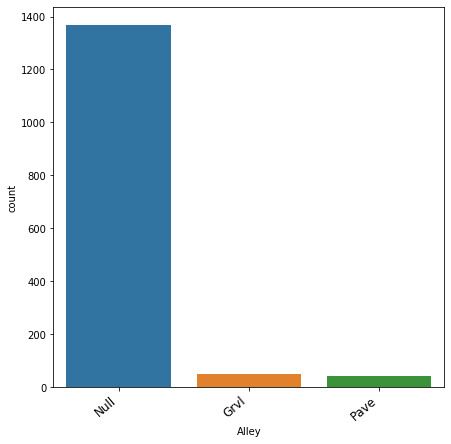

In [1701]:
#Alley Column

#Replacing NA with String 'Null' and then viewing the Plot
base_df['Alley'].fillna('Null',inplace=True)

#Plotting
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['Alley'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

**From Above Analysis for Alley Column, more than 90% are Nulls. We can replace them with 'No Alley Access'**

In [1702]:
base_df["Alley"].replace({"Null":"No Alley Access"},inplace=True)

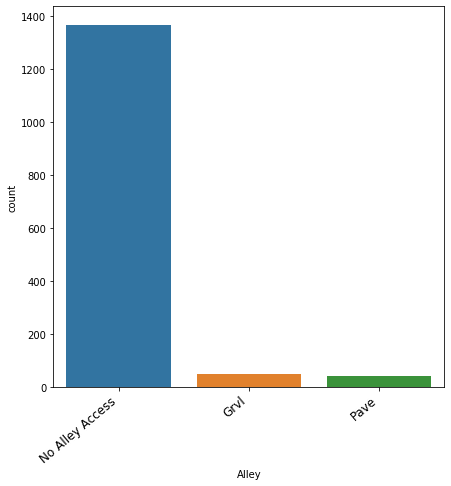

In [1703]:
#Plotting
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['Alley'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

**Since from the Above graph, it is visible that 'No Alley Access' is causing Skewness & has low variance . Hence this Column will not contribute to Learning Algorithm. Hence Dropping the Column**

In [1704]:
#Dropping Column Alley
base_df=base_df.drop(['Alley'],axis=1)

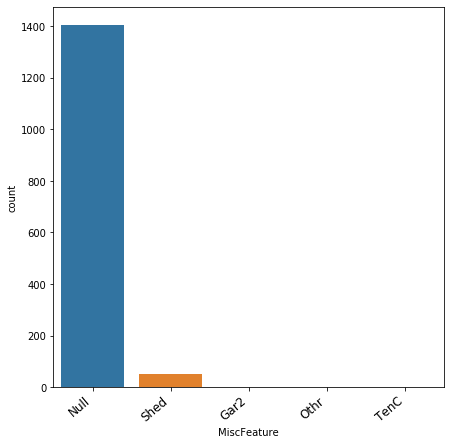

In [1705]:
#MiscFeature Column

#Replacing NA with String 'Null' and then viewing the Plot
base_df['MiscFeature'].fillna('Null',inplace=True)

#Plotting
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['MiscFeature'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

**From Above Analysis for MiscFeature Column, more than 90% are Nulls. We can replace them with 'None'**

In [1706]:
base_df["MiscFeature"].replace({"Null":"None"},inplace=True)

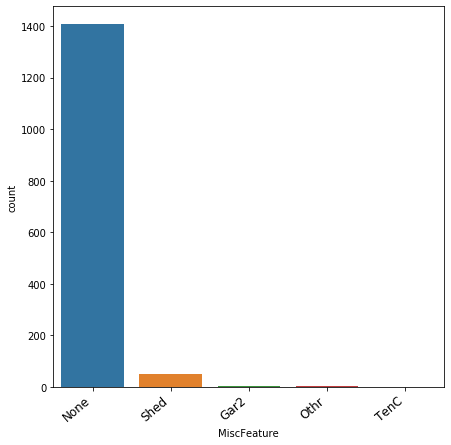

In [1707]:
#MiscFeature Column

#Plotting
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['MiscFeature'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

**Since from the Above graph, it is visible that 'None' is causing Skewness. Hence this Column will not contribute to Learning Algorithm. Hence Dropping the Column**

In [1708]:
#Dropping Column Alley
base_df=base_df.drop(['MiscFeature'],axis=1)

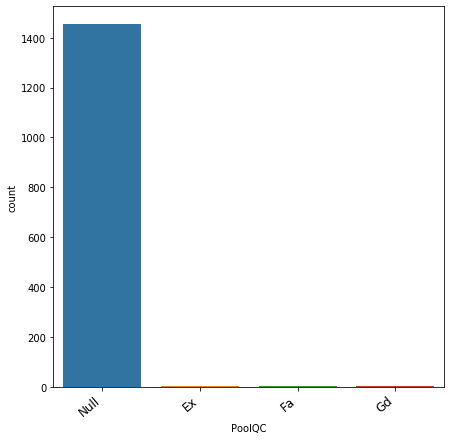

In [1709]:
#PoolQC Column

#Replacing NA with String 'Null' and then viewing the Plot
base_df['PoolQC'].fillna('Null',inplace=True)

#Plotting
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['PoolQC'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

**From Above Analysis for PoolQC Column, more than 90% are Nulls. We can replace them with 'No Pool'**

In [1710]:
base_df["PoolQC"].replace({"Null":"No Pool"},inplace=True)

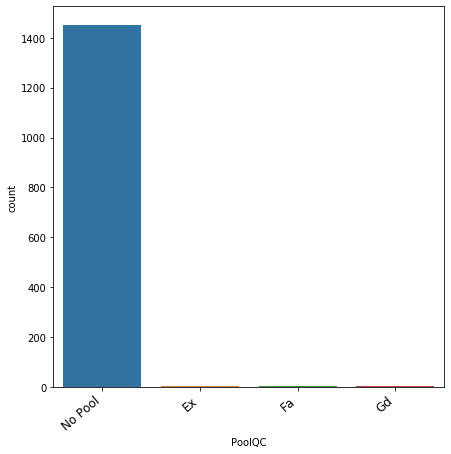

In [1711]:
#Plotting
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['PoolQC'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

**Since from the Above graph, it is visible that 'No Pool' is causing Skewness & has low variance. Hence this Column will not contribute to Learning Algorithm. Hence Dropping the Column**

In [1712]:
base_df=base_df.drop(['PoolQC'],axis=1)

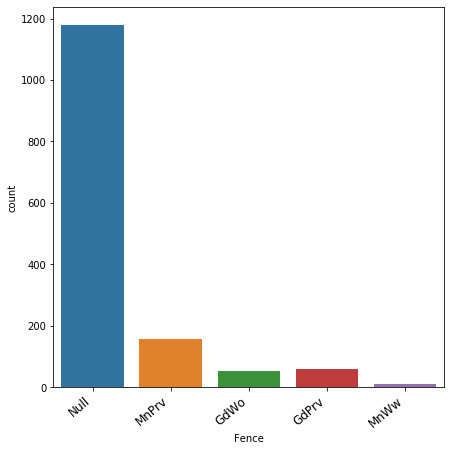

In [1713]:
#Fence Column
#Replacing NA with String 'Null' and then viewing the Plot
base_df['Fence'].fillna('Null',inplace=True)
#Plotting
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['Fence'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

In [1714]:
base_df["Fence"].replace({"Null":"No Fence"},inplace=True)

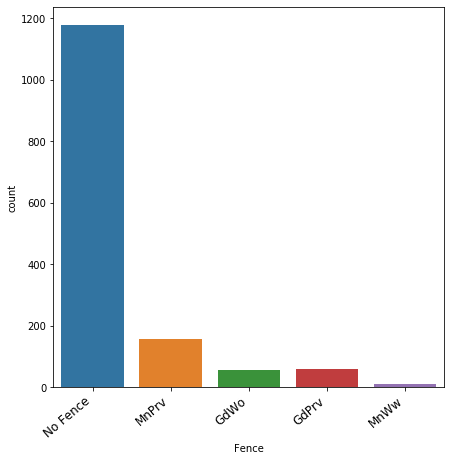

In [1715]:
#Plotting
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['Fence'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

**Since from the Above graph, it is visible that 'No Fence' is causing Skewness & has low variance. Hence this Column will not contribute to Learning Algorithm. Hence Dropping the Column**

In [1716]:
#Dropping Fence
base_df=base_df.drop(['Fence'],axis=1)

In [1717]:
#Base Data Shape
base_df.shape

(1460, 77)

In [1718]:
#Re-Analyze Nulls
round((base_df.isnull().sum()/len(base_df))*100,2).sort_values(ascending = False)

FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofMatl          0.00
RoofStyle         0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

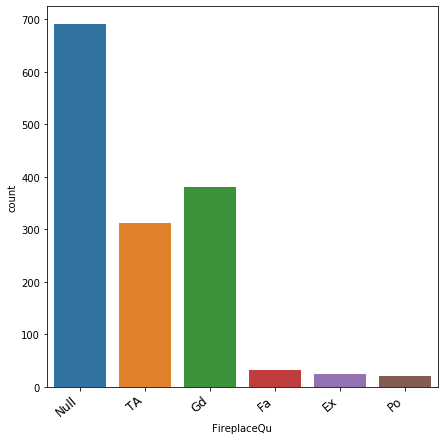

In [1719]:
#FireplaceQu Column
#Replacing NA with String 'Null' and then viewing the Plot
base_df['FireplaceQu'].fillna('Null',inplace=True)
#Plotting
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['FireplaceQu'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

In [1720]:
# Replacing Nulls with No Fireplace
base_df["FireplaceQu"].replace({"Null":"No FirePlace"},inplace=True)

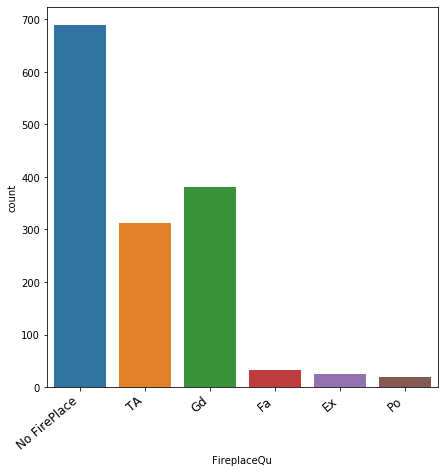

In [1721]:
#Plotting
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['FireplaceQu'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

**The Fireplace Column has Considerable variance & low skewness. Hence, it might be useful for model building.**

**Hence not dropping the column.Post model building, we can consider the co-efficients of this column** 

**and then decide to drop the column**

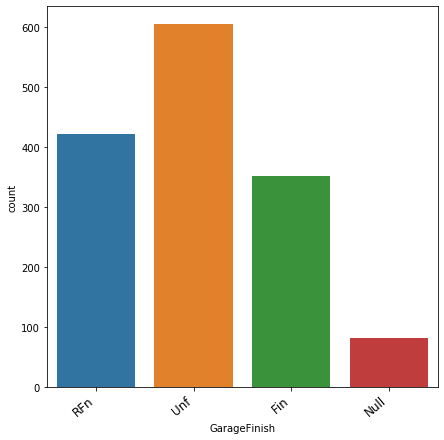

In [1722]:
#GarageFinish Column
#Replacing NA with String 'Null' and then viewing the Plot
base_df['GarageFinish'].fillna('Null',inplace=True)

#Plotting
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['GarageFinish'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

**From above graph, it can be seen that GarageFinish Column has Few Nulls and slight Variance. Hence not dropping the Column**

In [1723]:
#Re-Analyze Nulls
round((base_df.isnull().sum()/len(base_df))*100,2).sort_values(ascending = False)

LotFrontage      17.74
GarageType        5.55
GarageYrBlt       5.55
GarageCond        5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Exterior1st       0.00
RoofStyle         0.00
RoofMatl          0.00
ExterQual         0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterCond         0.00
Foundation        0.00
BsmtFinSF1        0.00
YearRemodAdd      0.00
SalePrice         0.00
OverallCond       0.00
Utilities         0.00
MSSubClass        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
                 ...  
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
Fireplaces        0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
FireplaceQu       0.00
Functional 

In [1724]:
#View Details for LotFrontage Column
base_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [1725]:
#Replacing Null in LotFrontage with Mean value of the column
base_df['LotFrontage'].fillna(base_df['LotFrontage'].mean(),inplace=True)

In [1726]:
#View Details for LotFrontage Column
base_df['LotFrontage'].describe()

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [1727]:
#Re-Analyze Nulls
round((base_df.isnull().sum()/len(base_df))*100,2).sort_values(ascending = False)

GarageType       5.55
GarageYrBlt      5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
YearBuilt        0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
Exterior2nd      0.00
Exterior1st      0.00
RoofMatl         0.00
BsmtFinSF1       0.00
RoofStyle        0.00
YearRemodAdd     0.00
SalePrice        0.00
OverallCond      0.00
OverallQual      0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
                 ... 
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
3SsnPorch        0.00
Fireplaces       0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
FireplaceQu      0.00
Functional       0.00
TotalBsmtSF      0.00
GrLivArea 

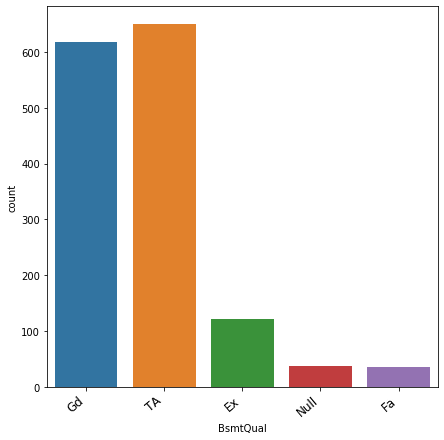

In [1728]:
#BsmtQual Column
#Replacing NA with String 'Null' and then viewing the Plot
base_df['BsmtQual'].fillna('Null',inplace=True)

#Plotting
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['BsmtQual'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

**BsmtQual has high variation and low missing values. Hence Replacing Nulls with No Basement & Not Dropping the Column**

In [1729]:
#Replacing Nulls with No Basement
base_df['BsmtQual'].replace({"Null":"No Basement"},inplace=True)

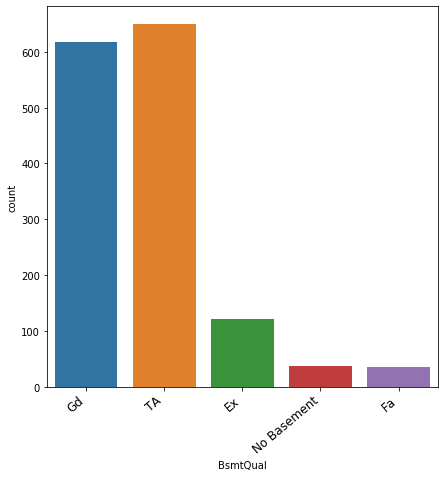

In [1730]:
#Plottiing the Variance
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['BsmtQual'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

In [1731]:
#Re-Analyze Nulls
round((base_df.isnull().sum()/len(base_df))*100,2).sort_values(ascending = False)

GarageType       5.55
GarageYrBlt      5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
ExterQual        0.00
YearBuilt        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
Exterior2nd      0.00
Exterior1st      0.00
RoofMatl         0.00
BsmtFinSF1       0.00
RoofStyle        0.00
YearRemodAdd     0.00
SalePrice        0.00
OverallCond      0.00
OverallQual      0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
                 ... 
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
3SsnPorch        0.00
Fireplaces       0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
FireplaceQu      0.00
Functional       0.00
TotalBsmtSF      0.00
GrLivArea 

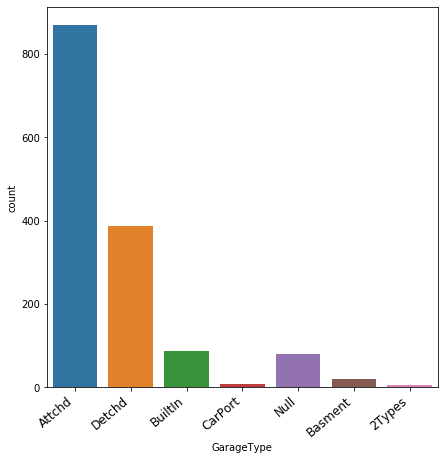

In [1732]:
#Analyzing GarageType
base_df['GarageType'].fillna('Null',inplace=True)

#Plottiing the Variance
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['GarageType'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

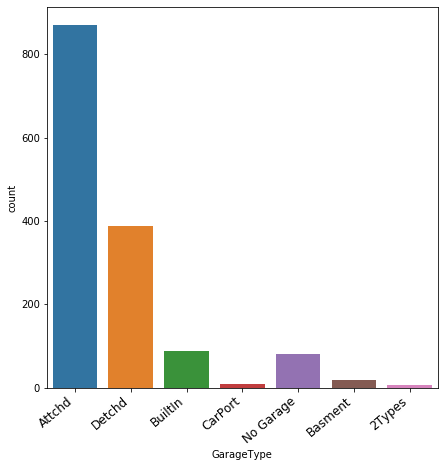

In [1733]:
#Replacing Nulls with not garage & Viewing Variance
base_df['GarageType'].replace({"Null":"No Garage"},inplace=True)

fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['GarageType'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

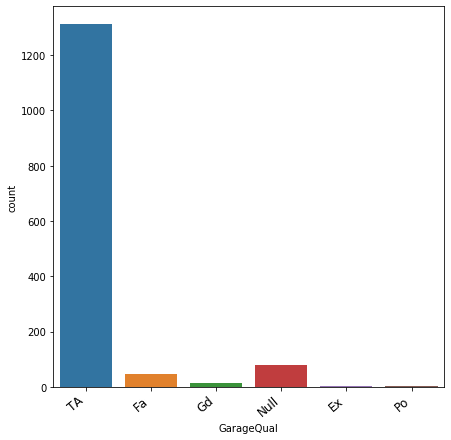

In [1734]:
#Analyzing GarageQual
base_df['GarageQual'].fillna('Null',inplace=True)

#Plottiing the Variance
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['GarageQual'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

**Since from the Above graph, it is visible that 'TA' is causing Skewness & has low variance.Hence this Column will not contribute to Learning Algorithm. Hence Dropping the Column**

In [1735]:
#Dropping GarageQual
base_df=base_df.drop(['GarageQual'],axis=1)

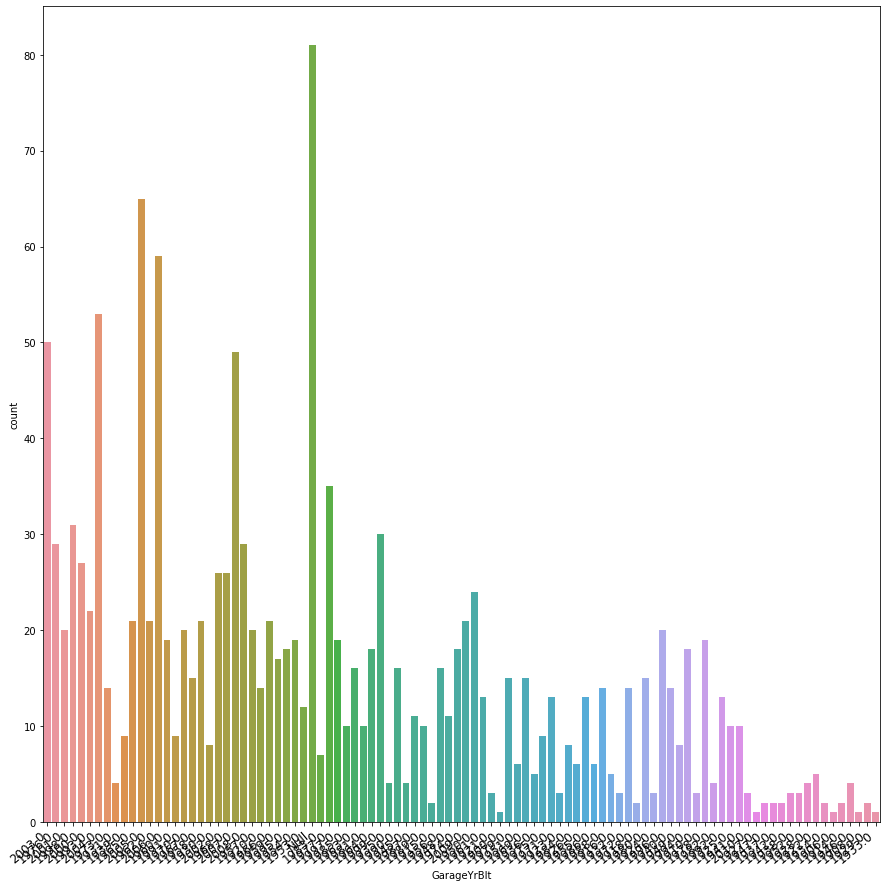

In [1736]:
#Analyzing GarageYrBlt
base_df['GarageYrBlt'].fillna('Null',inplace=True)

#Plottiing the Variance
fig, axs = plt.subplots(1, figsize = (15,15))
plt1 = sns.countplot(base_df['GarageYrBlt'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')


In [1737]:
base_df['GarageYrBlt'].describe()

count     1460
unique      98
top       Null
freq        81
Name: GarageYrBlt, dtype: object

**Since from the Above graph, it is visible that GarageYrBlt has no practical importance.Hence this Column will not contribute to Learning Algorithm. Hence Dropping the Column**

In [1738]:
#Dropping GarageYrBlt
base_df=base_df.drop(['GarageYrBlt'],axis=1)

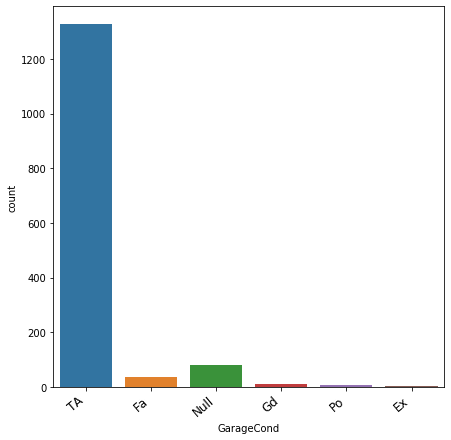

In [1739]:
#Analyzing GarageCond
base_df['GarageCond'].fillna('Null',inplace=True)

#Plottiing the Variance
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['GarageCond'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

**Since from the Above graph, it is visible that 'TA' is causing Skewness & has low variance.Hence this Column will not contribute to Learning Algorithm. Hence Dropping the Column**

In [1740]:
#Dropping GarageCond
base_df=base_df.drop(['GarageCond'],axis=1)

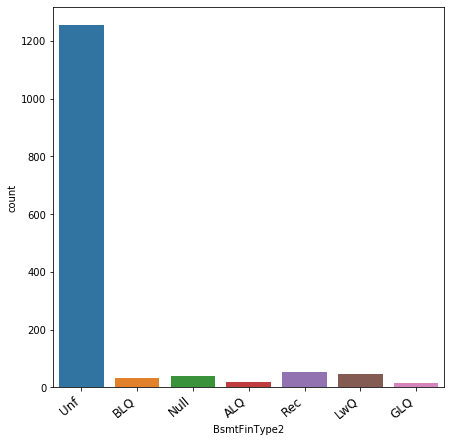

In [1741]:
#Analyzing BsmtFinType2
base_df['BsmtFinType2'].fillna('Null',inplace=True)

#Plottiing the Variance
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['BsmtFinType2'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

**Since from the Above graph, it is visible that 'Unf' is causing Skewness & has low variance.Hence this Column will not contribute to Learning Algorithm. Hence Dropping the Column**

In [1742]:
#Dropping BsmtFinType2
base_df=base_df.drop(['BsmtFinType2'],axis=1)

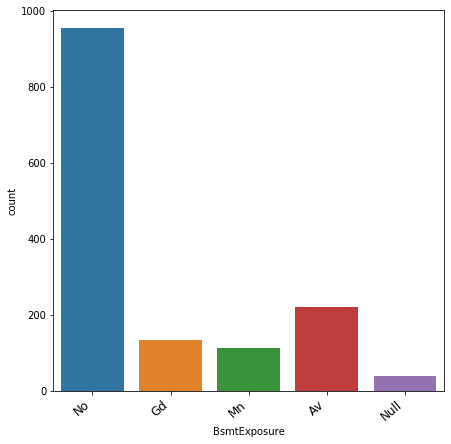

In [1743]:
#Analyzing BsmtExposure
base_df['BsmtExposure'].fillna('Null',inplace=True)

#Plottiing the Variance
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['BsmtExposure'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

**Since from the Above graph, it is visible that 'No' is causing Skewness & has low variance.Hence this Column will not contribute to Learning Algorithm. Hence Dropping the Column**

In [1744]:
#Dropping BsmtExposure
base_df=base_df.drop(['BsmtExposure'],axis=1)

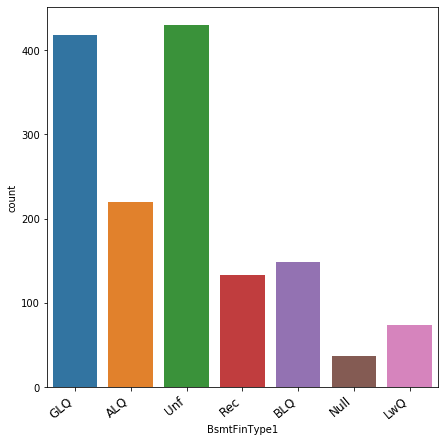

In [1745]:
#Analyzing BsmtFinType1
base_df['BsmtFinType1'].fillna('Null',inplace=True)

#Plottiing the Variance
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['BsmtFinType1'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

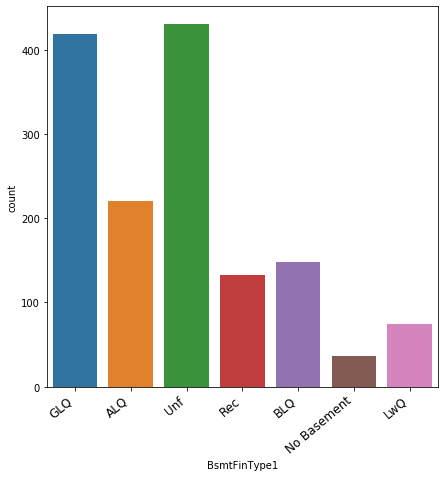

In [1746]:
#Replacing Nulls with No Basement & Viewing Variance
base_df['BsmtFinType1'].replace({"Null":"No Basement"},inplace=True)
#Plotting
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['BsmtFinType1'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

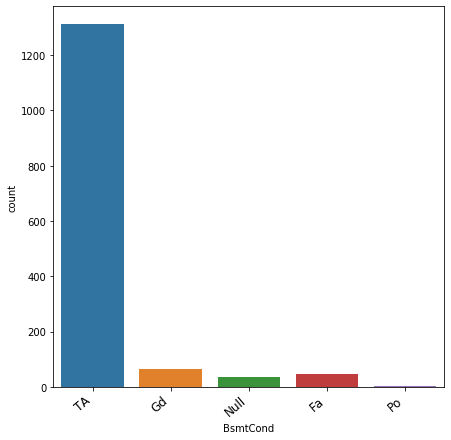

In [1747]:
#Analyzing BsmtCond
base_df['BsmtCond'].fillna('Null',inplace=True)

#Plottiing the Variance
fig, axs = plt.subplots(1, figsize = (7,7))
plt1 = sns.countplot(base_df['BsmtCond'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='large')

**Since from the Above graph, it is visible that 'No Fence' is causing Skewness & has low variance.Hence this Column will not contribute to Learning Algorithm. Hence Dropping the Column**

In [1748]:
#Dropping BsmtCond
base_df=base_df.drop(['BsmtCond'],axis=1)

In [1749]:
#Re-Analyze Nulls
round((base_df.isnull().sum()/len(base_df))*100,2).sort_values(ascending = False)

MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
SalePrice       0.00
YearRemodAdd    0.00
RoofStyle       0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
ExterQual       0.00
TotalBsmtSF     0.00
ExterCond       0.00
Foundation      0.00
BsmtQual        0.00
BsmtFinType1    0.00
BsmtFinSF1      0.00
BsmtFinSF2      0.00
YearBuilt       0.00
OverallCond     0.00
OverallQual     0.00
LandContour     0.00
MSSubClass      0.00
MSZoning        0.00
LotFrontage     0.00
LotArea         0.00
Street          0.00
LotShape        0.00
Utilities       0.00
HouseStyle      0.00
LotConfig       0.00
                ... 
GarageArea      0.00
PavedDrive      0.00
WoodDeckSF      0.00
OpenPorchSF     0.00
3SsnPorch       0.00
HeatingQC       0.00
ScreenPorch     0.00
PoolArea        0.00
MiscVal         0.00
MoSold          0.00
YrSold          0.00
SaleType        0.00
GarageType      0.00
FireplaceQu     0.00
Fireplaces      0.00
Functional      0.00
TotRmsAbvGrd 

**Remaining Null values are negligible. Dropping the null rows**

In [1750]:
#Dropping Null Rows
base_df.dropna(subset = ["MasVnrArea"], inplace=True)

In [1751]:
#Re-Analyze Nulls
round((base_df.isnull().sum()/len(base_df))*100,2).sort_values(ascending = False)

Electrical      0.07
SalePrice       0.00
MasVnrArea      0.00
YearRemodAdd    0.00
RoofStyle       0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
MasVnrType      0.00
ExterQual       0.00
TotalBsmtSF     0.00
ExterCond       0.00
Foundation      0.00
BsmtQual        0.00
BsmtFinType1    0.00
BsmtFinSF1      0.00
BsmtFinSF2      0.00
YearBuilt       0.00
OverallCond     0.00
OverallQual     0.00
LandContour     0.00
MSSubClass      0.00
MSZoning        0.00
LotFrontage     0.00
LotArea         0.00
Street          0.00
LotShape        0.00
Utilities       0.00
HouseStyle      0.00
LotConfig       0.00
                ... 
GarageArea      0.00
PavedDrive      0.00
WoodDeckSF      0.00
OpenPorchSF     0.00
3SsnPorch       0.00
HeatingQC       0.00
ScreenPorch     0.00
PoolArea        0.00
MiscVal         0.00
MoSold          0.00
YrSold          0.00
SaleType        0.00
GarageType      0.00
FireplaceQu     0.00
Fireplaces      0.00
Functional      0.00
TotRmsAbvGrd 

In [1752]:
#Dropping Null Rows
base_df.dropna(subset = ["Electrical"], inplace=True)

In [1753]:
#Statistics post Data Cleansing
base_df.shape

(1451, 71)

In [1754]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 71 columns):
Id               1451 non-null int64
MSSubClass       1451 non-null int64
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451 non

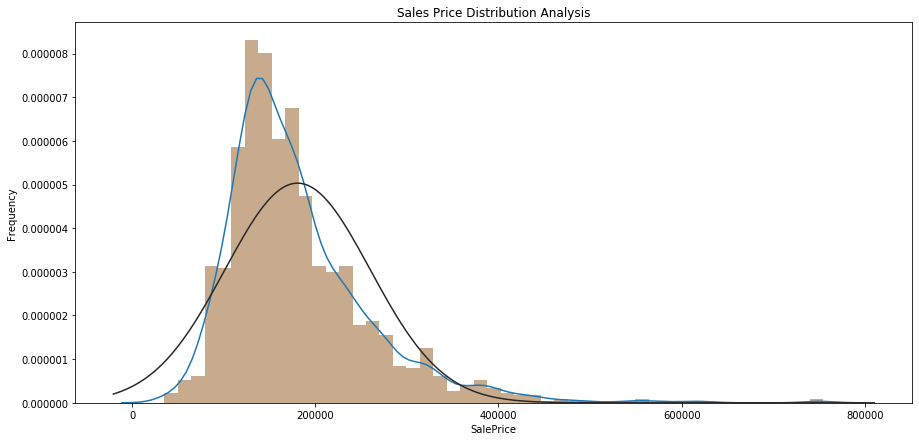

In [1755]:
#Analyzng Target Column - SalesPrice
fig, axs = plt.subplots(1, figsize = (15,7))
plt.ylabel('Frequency')
plt.title('Sales Price Distribution Analysis')
(mu, sigma) = norm.fit(base_df['SalePrice'])
sns.distplot(base_df['SalePrice'])
ax = sns.distplot(base_df['SalePrice'], fit=norm, kde=False)

**From Above Graph, it can be seen that the Salesprice is not Normalized. We can transform the column using the Log Function.**

In [1756]:
#Applying Log Transofrmation on Sales Price Column
base_df["SalePrice"] = np.log1p(base_df["SalePrice"])

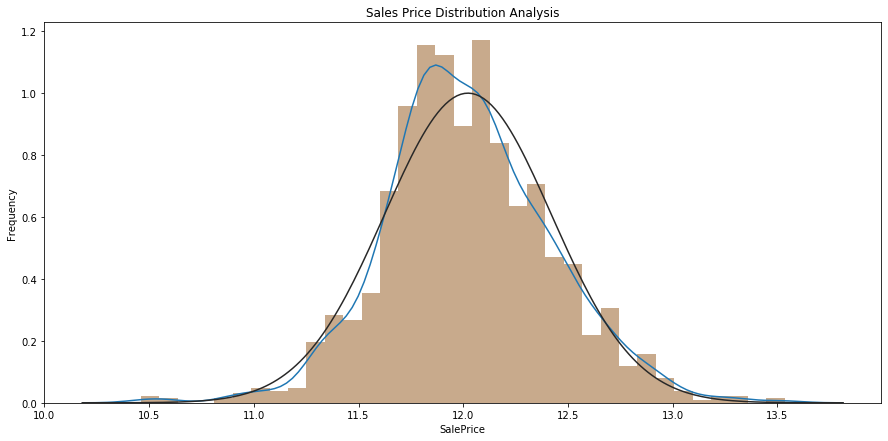

In [1757]:
#Analyzng Target Column - SalesPrice  Post Log Tansformation
fig, axs = plt.subplots(1, figsize = (15,7))
plt.ylabel('Frequency')
plt.title('Sales Price Distribution Analysis')
(mu, sigma) = norm.fit(base_df['SalePrice'])
sns.distplot(base_df['SalePrice'])
ax = sns.distplot(base_df['SalePrice'], fit=norm, kde=False)

In [1758]:
#Data Conversions

base_df['MSSubClass'] = base_df['MSSubClass'].apply(str)
base_df['OverallCond'] = base_df['OverallCond'].astype(str)

#Year and Month Sold,Year Built & YearRemodAdd can be Considered as Categorical Features
base_df['YrSold'] = base_df['YrSold'].astype(str)
base_df['MoSold'] = base_df['MoSold'].astype(str)
base_df['YearBuilt'] = base_df['YearBuilt'].astype(str)
base_df['YearRemodAdd'] = base_df['YearRemodAdd'].astype(str)

In [1759]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 71 columns):
Id               1451 non-null int64
MSSubClass       1451 non-null object
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null object
YearBuilt        1451 non-null object
YearRemodAdd     1451 non-null object
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451

In [1760]:
#Adding Feature Total Area, as sum (TotalBsmtSF,stFlrSF,2ndFlrSF,PoolArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch)
base_df["Total_Area_SF"]=base_df["TotalBsmtSF"]+base_df["1stFlrSF"]+base_df["PoolArea"]+base_df["2ndFlrSF"]+base_df["WoodDeckSF"]+base_df["OpenPorchSF"]+base_df["EnclosedPorch"]+base_df["3SsnPorch"]+base_df["ScreenPorch"]

In [1761]:
#Since we have added a Feature Total Area, we can drop the Base columns used to derive the same.
base_df=base_df.drop(['TotalBsmtSF'],axis=1)
base_df=base_df.drop(['1stFlrSF'],axis=1)
base_df=base_df.drop(['2ndFlrSF'],axis=1)
base_df=base_df.drop(['PoolArea'],axis=1)
base_df=base_df.drop(['WoodDeckSF'],axis=1)
base_df=base_df.drop(['OpenPorchSF'],axis=1)
base_df=base_df.drop(['3SsnPorch'],axis=1)
base_df=base_df.drop(['ScreenPorch'],axis=1)

#BsmtFinSF1,BsmtFinSF2 & BsmtUnfSF can be dropped since we have total basement SF. These columns will only add to redundancy.
base_df=base_df.drop(['BsmtFinSF1'],axis=1)
base_df=base_df.drop(['BsmtFinSF2'],axis=1)
base_df=base_df.drop(['BsmtUnfSF'],axis=1)

In [1762]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 61 columns):
Id               1451 non-null int64
MSSubClass       1451 non-null object
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null object
YearBuilt        1451 non-null object
YearRemodAdd     1451 non-null object
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451

In [1763]:
#Merge Features

#In SaleType,Replace WD,CWD,VWD  with Waranty Deed
base_df['SaleType'] = base_df['SaleType'].replace(['WD','CWD','VWD'], 'Waranty Deed')

#In LotShape,Replace IR1,IR2,IR3  with Irregular
base_df['LotShape'] = base_df['LotShape'].replace(['IR1','IR2','IR3'], 'Irregular')


#In LotConfig,Replace FR2,FR3  with Frontage
base_df['LotConfig'] = base_df['LotConfig'].replace(['FR2','FR3'], 'Frontage')


#In MSZoning,Replace RH,RL,RP,RM  with Residential
base_df['MSZoning'] = base_df['MSZoning'].replace(['RH','RL','RP','RM'], 'Frontage')

**Data Preparation**

In [1764]:
# Splitting Predictor, Target & ID Variable

#ID
data_id=base_df["Id"]

#Target
Y=round(base_df["SalePrice"],2)

#Predictor 

X=base_df.loc[:, ['MSSubClass','MSZoning','LotFrontage','LotArea','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt',
'YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtFinType1','Heating','HeatingQC','CentralAir','Electrical',
'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars','GarageArea',
'PavedDrive','EnclosedPorch','MiscVal','MoSold','YrSold','SaleType','SaleCondition','Total_Area_SF']]


In [1765]:
#Creating Dummies
house_catg=X.select_dtypes(include=['object'])
house_dummies = pd.get_dummies(house_catg, drop_first=True)
house_dummies.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_Waranty Deed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [1766]:
# drop categorical variables 
X = X.drop(list(house_catg.columns), axis=1)

In [1767]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [1768]:
X.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_Waranty Deed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,196.0,0,1710,1,0,2,1,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,0.0,0,1262,0,1,2,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,162.0,0,1786,1,0,2,1,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,0.0,0,1717,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,350.0,0,2198,1,0,2,1,...,0,0,0,0,1,0,0,0,1,0


In [1769]:
#Scaling the Numeric Columns
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_Waranty Deed', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=407)

In [1770]:
#Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size=0.7,test_size = 0.3, random_state=100)

**Ridge Regression**

In [1771]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    5.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1772]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.037287,0.021423,0.003789,0.002630,0.0001,{'alpha': 0.0001},-0.136234,-0.106575,-0.128813,-0.144651,...,-0.125281,0.014745,28,-0.047256,-0.050640,-0.047430,-0.050048,-0.049544,-0.048984,0.001385
1,0.021930,0.001418,0.002400,0.000802,0.001,{'alpha': 0.001},-0.136219,-0.106574,-0.128807,-0.144634,...,-0.125272,0.014739,27,-0.047257,-0.050640,-0.047430,-0.050048,-0.049544,-0.048984,0.001385
2,0.040555,0.007883,0.002507,0.000582,0.01,{'alpha': 0.01},-0.136074,-0.106560,-0.128751,-0.144462,...,-0.125189,0.014680,26,-0.047257,-0.050641,-0.047430,-0.050048,-0.049547,-0.048985,0.001385
3,0.035274,0.006315,0.003015,0.000026,0.05,{'alpha': 0.05},-0.135510,-0.106549,-0.128502,-0.143701,...,-0.124845,0.014415,25,-0.047265,-0.050646,-0.047429,-0.050050,-0.049562,-0.048991,0.001386
4,0.052860,0.029552,0.004787,0.002130,0.1,{'alpha': 0.1},-0.134928,-0.106540,-0.128199,-0.142770,...,-0.124446,0.014107,24,-0.047274,-0.050657,-0.047431,-0.050063,-0.049583,-0.049002,0.001390


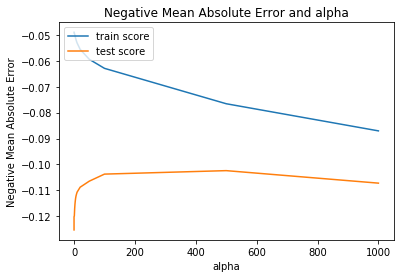

In [1773]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1774]:
#Optimal Alpha
model_cv.best_params_

{'alpha': 500}

In [1775]:
model_cv.best_score_

-0.1024006149322474

In [1776]:
model_cv.best_estimator_

Ridge(alpha=500, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [1777]:
#Co-efficient List
alpha = 500
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
#ridge.coef_

Ridge(alpha=500, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [1778]:
#Assigning Ridge co-efficients
coef = pd.Series(ridge.coef_, index = X_train.columns)


Text(0.5, 1.0, 'Predictors in the Ridge Model')

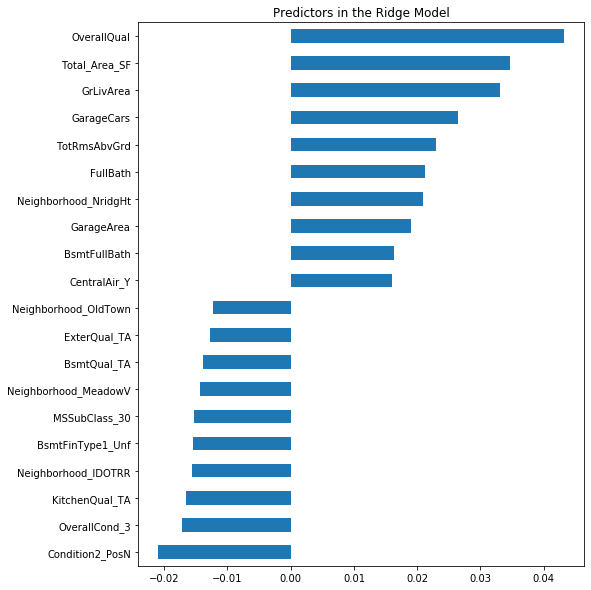

In [1779]:
# Top & Bottom 10 Co-efficients

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Predictors in the Ridge Model")

In [1780]:
#Ridge Scores
ridge_sc = Ridge(alpha=500)

#Train DaTa
ridge_sc.fit(X_train, y_train) 
pred_train_rr= ridge_sc.predict(X_train)
print('Root Mean Squared Error [Train]- ',end='')
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print('R2 Score [Train]- ',end='')
print(r2_score(y_train, pred_train_rr)*100)


Root Mean Squared Error [Train]- 0.11338881148450287
0.11338881148450287
R2 Score [Train]- 91.97771817120322


**Doubling the Alpha Values- Start**

In [1781]:
#Co-efficient List
alpha = 1000 # Increasing value to 1000 from 500
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)


Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [1782]:
#Assigning Ridge co-efficients
coef = pd.Series(ridge.coef_, index = X_train.columns)

Text(0.5, 1.0, 'Predictors in the Ridge Model - After Doubling the Alpha Value')

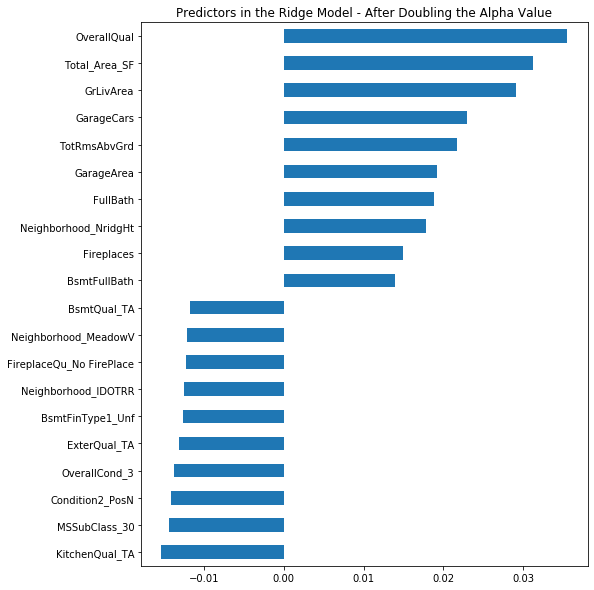

In [1783]:
# Top & Bottom 10 Co-efficients

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Predictors in the Ridge Model - After Doubling the Alpha Value")

In [1784]:
#Ridge Scores
ridge_sc = Ridge(alpha=1000) #Changed Value to 1000

#Train DaTa
ridge_sc.fit(X_train, y_train) 
pred_train_rr= ridge_sc.predict(X_train)
print('Root Mean Squared Error [Train]- ',end='')
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print('R2 Score [Train]- ',end='')
print(r2_score(y_train, pred_train_rr)*100)

Root Mean Squared Error [Train]- 0.1260900281848026
R2 Score [Train]- 90.07983279388677


**Doubling the Alpha Values- End**

**Removing Top 5 Predictor Variables Start**

In [1785]:
#Dropping Top 5 Predictor Variables
X_train_new=X_train.drop(['OverallQual','Total_Area_SF','GrLivArea','GarageCars','TotRmsAbvGrd'],axis=1)

In [1786]:
#Remodelling After Dropping Top 5 Columns
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1787]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026091,0.002208,0.003041,0.000915,0.0001,{'alpha': 0.0001},-0.155946,-0.148971,-0.146628,-0.166941,...,-0.150896,0.010266,28,-0.060991,-0.062169,-0.064161,-0.065069,-0.065050,-0.063488,0.001635
1,0.029524,0.008514,0.002421,0.000477,0.001,{'alpha': 0.001},-0.155915,-0.148965,-0.146622,-0.166922,...,-0.150883,0.010259,27,-0.060992,-0.062169,-0.064161,-0.065070,-0.065050,-0.063488,0.001635
2,0.027327,0.003432,0.002394,0.000488,0.01,{'alpha': 0.01},-0.155607,-0.148915,-0.146566,-0.166731,...,-0.150755,0.010185,26,-0.060996,-0.062171,-0.064162,-0.065077,-0.065052,-0.063492,0.001635
3,0.026577,0.003313,0.002353,0.000440,0.05,{'alpha': 0.05},-0.154408,-0.148706,-0.146328,-0.165920,...,-0.150236,0.009889,25,-0.061024,-0.062177,-0.064170,-0.065107,-0.065062,-0.063508,0.001634
4,0.024180,0.000798,0.002202,0.000424,0.1,{'alpha': 0.1},-0.153215,-0.148468,-0.146054,-0.164973,...,-0.149671,0.009570,24,-0.061068,-0.062186,-0.064188,-0.065135,-0.065074,-0.063530,0.001629


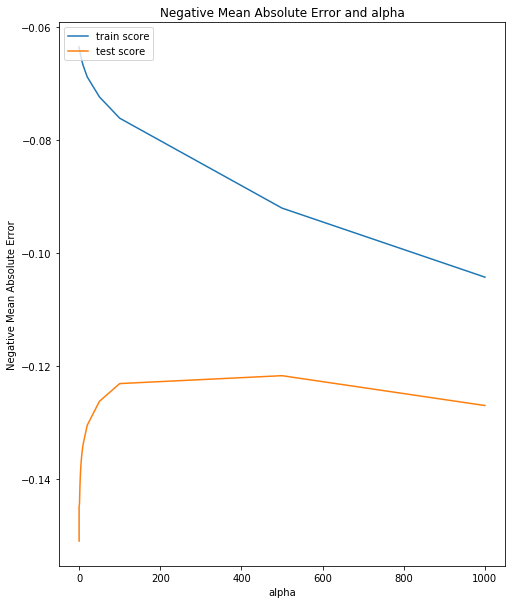

In [1788]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1789]:
#Optimal Alpha
model_cv.best_params_

{'alpha': 500}

In [1790]:
model_cv.best_score_

-0.12164007428279508

In [1791]:
model_cv.best_estimator_

Ridge(alpha=500, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [1792]:
#Co-efficient List
alpha = 500
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_new, y_train)
#ridge.coef_

Ridge(alpha=500, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [1793]:
#Assigning Ridge co-efficients
coef = pd.Series(ridge.coef_, index = X_train_new.columns)

Text(0.5, 1.0, 'Predictors in the Ridge Model Post Top 5 Predictor Removal & Remodel')

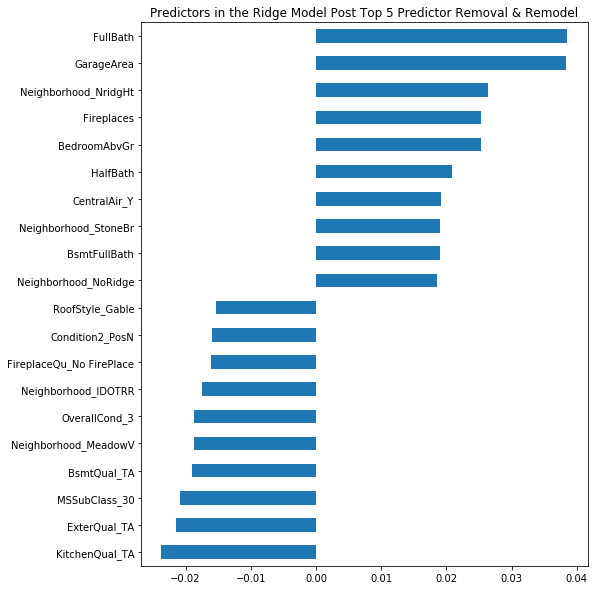

In [1794]:
# Top & Bottom 10 Co-efficients

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Predictors in the Ridge Model Post Top 5 Predictor Removal & Remodel")

**Removing Top 5 Predictor Variables End**

**Lasso Regression**

In [1795]:
lasso = Lasso()
# cross validation
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1796]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1.5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026091,0.002208,0.003041,0.000915,0.0001,{'alpha': 0.0001},-0.155946,-0.148971,-0.146628,-0.166941,...,-0.150896,0.010266,28,-0.060991,-0.062169,-0.064161,-0.065069,-0.065050,-0.063488,0.001635
1,0.029524,0.008514,0.002421,0.000477,0.001,{'alpha': 0.001},-0.155915,-0.148965,-0.146622,-0.166922,...,-0.150883,0.010259,27,-0.060992,-0.062169,-0.064161,-0.065070,-0.065050,-0.063488,0.001635
2,0.027327,0.003432,0.002394,0.000488,0.01,{'alpha': 0.01},-0.155607,-0.148915,-0.146566,-0.166731,...,-0.150755,0.010185,26,-0.060996,-0.062171,-0.064162,-0.065077,-0.065052,-0.063492,0.001635
3,0.026577,0.003313,0.002353,0.000440,0.05,{'alpha': 0.05},-0.154408,-0.148706,-0.146328,-0.165920,...,-0.150236,0.009889,25,-0.061024,-0.062177,-0.064170,-0.065107,-0.065062,-0.063508,0.001634
4,0.024180,0.000798,0.002202,0.000424,0.1,{'alpha': 0.1},-0.153215,-0.148468,-0.146054,-0.164973,...,-0.149671,0.009570,24,-0.061068,-0.062186,-0.064188,-0.065135,-0.065074,-0.063530,0.001629


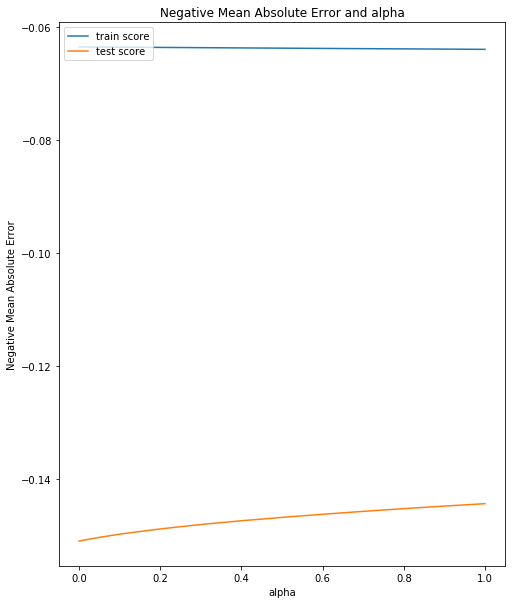

In [1797]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1798]:
#Optimal Alpha
model_cv1.best_params_

{'alpha': 0.001}

In [1799]:
model_cv1.best_score_

-0.09651235999789363

In [1800]:
model_cv1.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1801]:
#Determining Co-efficients
alpha =0.001
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1802]:
#Assigning Lasso Coefficients
coef = pd.Series(lasso.coef_, index = X_train.columns)

Text(0.5, 1.0, 'Predictors in the Lasso Model')

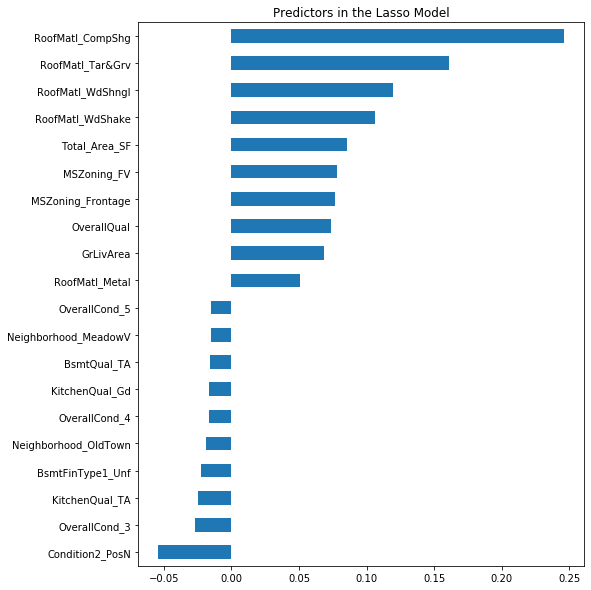

In [1803]:
# Top & Bottom 10 Co-efficients
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Predictors in the Lasso Model")

In [1804]:
#Lasso Scores

lasso_sc=Lasso(alpha=0.001)
lasso_sc.fit(X_train, y_train) 
pred_train_lasso= lasso_sc.predict(X_train)

#Train Data

print('Root Mean Squared Error [Train]- ',end='')
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('R2 Score [Train]- ',end='')
print(r2_score(y_train, pred_train_lasso)*100)



Root Mean Squared Error [Train]- 0.08334663415546764
R2 Score [Train]- 95.66555355891262


**Doubling the Alpha Values - Start**

In [1805]:
#Determining Co-efficients
alpha =0.002 #Changed value from 0.001 to 0.002
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Text(0.5, 1.0, 'Predictors in the Lasso Model- After Doubling the Alpha Value')

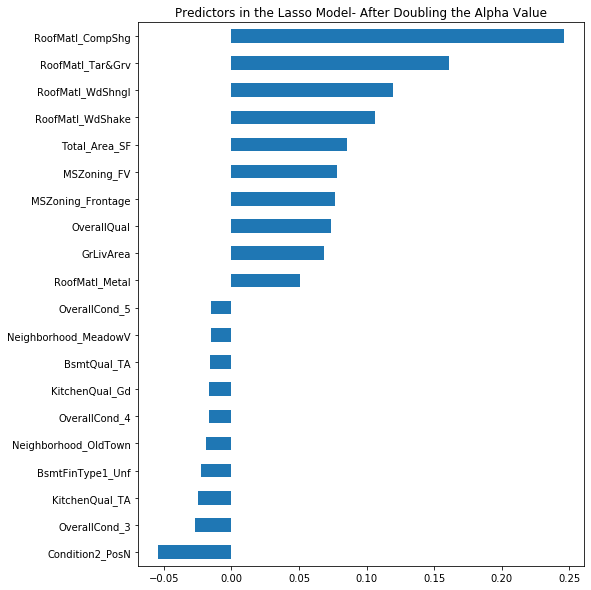

In [1806]:
# Top & Bottom 10 Co-efficients
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Predictors in the Lasso Model- After Doubling the Alpha Value")

In [1807]:
#Lasso Scores

lasso_sc=Lasso(alpha=0.002) # Doubled the value to 0.002
lasso_sc.fit(X_train, y_train) 
pred_train_lasso= lasso_sc.predict(X_train)

#Train Data

print('Root Mean Squared Error [Train]- ',end='')
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('R2 Score [Train]- ',end='')
print(r2_score(y_train, pred_train_lasso)*100)

Root Mean Squared Error [Train]- 0.09382047505512889
R2 Score [Train]- 94.50771880790356


**Doubling the Alpha Values - End**

**Dropping Top 5 Predictor Variables - Start**

In [1808]:
#Dropping top 5 Predictor Variables for Lasso
X_train_lasso=X_train.drop(['RoofMatl_CompShg','RoofMatl_Tar&Grv','RoofMatl_WdShngl','RoofMatl_WdShake','Total_Area_SF'],axis=1)


In [1809]:
lasso = Lasso()
# cross validation
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv1.fit(X_train_lasso, y_train) 



Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1810]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1.5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026091,0.002208,0.003041,0.000915,0.0001,{'alpha': 0.0001},-0.155946,-0.148971,-0.146628,-0.166941,...,-0.150896,0.010266,28,-0.060991,-0.062169,-0.064161,-0.065069,-0.065050,-0.063488,0.001635
1,0.029524,0.008514,0.002421,0.000477,0.001,{'alpha': 0.001},-0.155915,-0.148965,-0.146622,-0.166922,...,-0.150883,0.010259,27,-0.060992,-0.062169,-0.064161,-0.065070,-0.065050,-0.063488,0.001635
2,0.027327,0.003432,0.002394,0.000488,0.01,{'alpha': 0.01},-0.155607,-0.148915,-0.146566,-0.166731,...,-0.150755,0.010185,26,-0.060996,-0.062171,-0.064162,-0.065077,-0.065052,-0.063492,0.001635
3,0.026577,0.003313,0.002353,0.000440,0.05,{'alpha': 0.05},-0.154408,-0.148706,-0.146328,-0.165920,...,-0.150236,0.009889,25,-0.061024,-0.062177,-0.064170,-0.065107,-0.065062,-0.063508,0.001634
4,0.024180,0.000798,0.002202,0.000424,0.1,{'alpha': 0.1},-0.153215,-0.148468,-0.146054,-0.164973,...,-0.149671,0.009570,24,-0.061068,-0.062186,-0.064188,-0.065135,-0.065074,-0.063530,0.001629


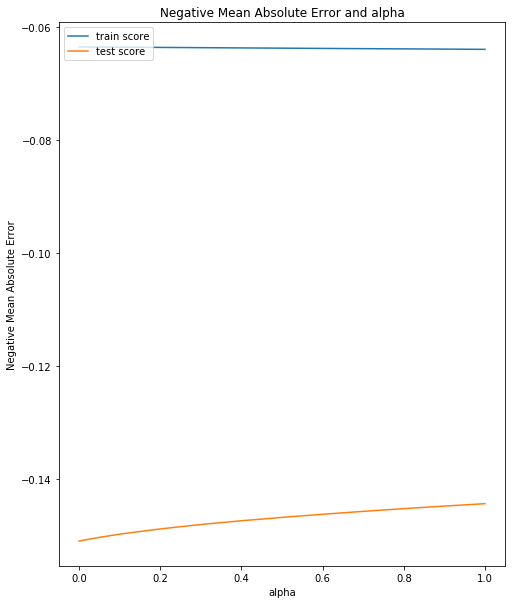

In [1811]:
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [1812]:
#Optimal Alpha
model_cv1.best_params_

{'alpha': 0.01}

In [1813]:
model_cv1.best_score_

-0.10038818774676672

In [1814]:
model_cv1.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1815]:
#Determining Co-efficients
alpha =0.01
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train_lasso, y_train) 

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1816]:
#Assigning Lasso Coefficients
coef = pd.Series(lasso.coef_, index = X_train_lasso.columns)

Text(0.5, 1.0, 'Predictors in the Lasso Model- Post Top 5 Predictor Dropping & Remodel')

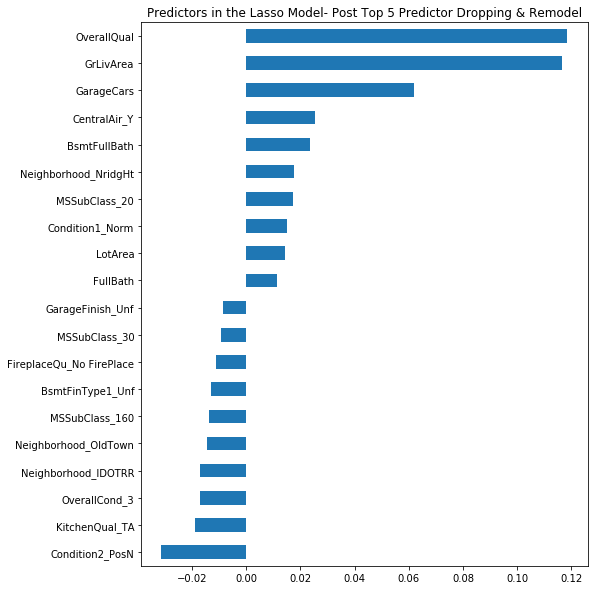

In [1817]:

# Top & Bottom 10 Co-efficients
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Predictors in the Lasso Model- Post Top 5 Predictor Dropping & Remodel")

**Dropping Top 5 Predictor Variables - End**

**Complete**